<a href="https://colab.research.google.com/github/sdlanda77/portfolio/blob/main/Sam_L_hw1_release.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1: (20 points)

Consider the casino game of [blackjack](https://en.wikipedia.org/wiki/Blackjack). This involves two players, the agent and the dealer, each of whom starts a game with two cards. The agent's goal is to beat the dealer by drawing cards from a deck until the sum of its hand is as close as possible to 21 without going over. The agent can see one of the dealer's cards, while the other is hidden. This is a simplified game, so the agent is only able to either "hit" (draw a card) or "stay" (end its turn). Here you should assume that the dealer has a *fixed* strategy (e.g., draw until it reaches 17, and then stop), and that its actions do not depend on the agent at all.

1. Classify this task environment according to the six properties discussed in class, and include a one- or two-sentence justification for each.

2. Suppose we formulate this as a search problem. Give a state space description of this problem. What are the states, including initial and goal states, actions, transition model, and action costs? It is possible for some of these to be "trivial", but include an explanation.

ENTER YOUR RESPONSES HERE

1. a. Fully or partially observable?

Partially. The agent can only see one of the dealer's cards and we do not know what card we will draw if we choose to hit so there is some relevant information that is unreachable. 

   b. Single-agent or multi-agent? 

Multi-agent. It is adversarial because the dealer is attempting to maximize thier performance measure (in this case in a fixed manner), effectively attempting to minimize the agent's performance measure.

   c. Deterministic or stochastic?

Stochastic. The next state of the environment is partially determined by the card drawn in the case of a hit. Since this is random, we can not always fully determine the next state of the environment.

   d. Episodic or sequential?

Sequential. The choice to hit or stay will affect all future choices, depending on the value of the card from a hit. 

   e. Static or dynamic?

Static. The state will not change while the agent is deciding to hit or stay.

   f. Discrete or continuous?

Discrete. There is a finite number of actions (hit or stay), states (combinations of cards summing less than 21), and percepts (card that the dealer can have).

2. a. States:

Any combination of cards that the agent holds. This includes any combination of cards that sums less than 21, and any combination where all but one card sums to less than 21 (in the case that the agent busts). 

Initial state: 

The two card hand directly after dealing. This is the starting hand. 

Goal state: 

A hand that sums to 21, since this is the ideal hand in the game. 

   b. Actions:

Hit and stay, these are the only two allowed moves in the game.

   c. Transition model:

Since hit and stay are the only option, the transition moddel follows two actions:

Where S is any state where S = the sum of the cards

Result(S, stay) = S --> returns the same hand

Result(S, hit) = {S + x | 1 <= x <= 11 AND x is an integer} --> returns the hand with a new card and its associated value



   d. Action costs: 

In the case of a hit, the action cost would be associated with the risk of going over 21. In the case of stay, the action cost would be proportional to how far from 21 the agent is, because their risk of losing is higher when the hand is lower. The assignment of numerical values would be correlated with the state and the action.


# Problem 2: (20 points)

In the state space graph below, S is the start state and G1 and G2 are both possible goal states. Costs are shown along edges and heuristic values are shown in the rectangles next to each node. Assume that search algorithms expand states in alphabetical order when ties are present. 

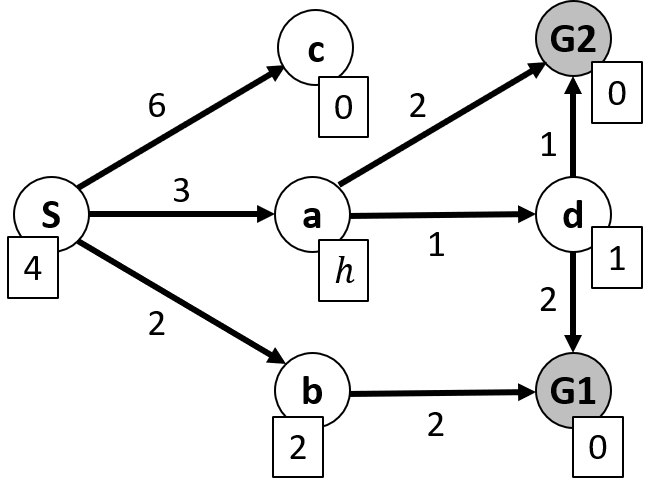

1. List (in order) the states expanded and the final solution (also as a state sequence) returned by DFS, BFS, and UCS. Assume that goal checking is done only when a node is popped off the frontier.

2. Give the solution that would be returned by A* a) for an admissible value of $h$ and b) for an inadmissible value of $h$. Please state the actual value that you used for each case. Depending on your answer, explain why they are the same or why they are different.

ENTER YOUR RESPONSES HERE

1. a. DFS: S a d G1 G2 b c

  Final state sequence is S a d G1
   
   b. BFS: S a b c d G1 G2 

   Final state sequence is S b G1

   c. UCS: S b a d G1

   Final state sequence is S b G1
2. a. $h$ is admissible: h=2

Solution: S b G1

   b. $h$ is inadmissible: h=10

   Solution: S b G1

   c. Explanation: They are the same because a is not along the optimal path. Therefore, increasing h(a) to an inadmissible value lowers the chance that we will find a solution through node a. In the case that h(b) was inadmissible, we would find a different solution.

# Word Ladder

In this assignment you will implement and use search algorithms to solve [word ladder](https://en.wikipedia.org/wiki/Word_ladder) puzzles. Given two English words, the goal is to transform the first word into the second word by changing one letter at a time. The catch is that each new word in the process must also be an English (dictionary) word. The following function encodes this process using the [pyenchant](https://pypi.org/project/pyenchant/) package.

In [ ]:
# RUN THIS ONCE IN THE BEGINNING TO INSTALL PYENCHANT
!pip install pyenchant
!apt-get install libenchant1c2a

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libenchant1c2a is already the newest version (1.6.0-11.1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [ ]:
import enchant, string

def successors(state):
  """
  Given a word, find all possible English word results from changing one letter.
  Return a list of (action, word) pairs, where action is the index of the
  changed letter.
  """
  d = enchant.Dict("en_US")
  child_states = []
  for i in range(len(state)):
    new = [state[:i]+x+state[i+1:] for x in string.ascii_lowercase]
    words = [x for x in new if d.check(x) and x != state]
    child_states = child_states + [(i, word) for word in words]
  return child_states

The ```successors``` function returns viable successor words during search. Below is a partial implementation of ```best_first_search```. This follows the pseudocode provided in lecture and the textbook with some enhancements. It takes in as arguments the starting state, goal state, a priority function ```f```, and a depth limit (for depth-limited search). When finished, it returns either a node containing the goal state or ```None```, along with the frontier's maximum size and number of nodes expanded. Some more implementation details...

*   Nodes are implemented as Python dictionaries. A node contains four components: the state, the node's parent, the action going from parent to this node, and the associated cost.
*   We implement a priority queue using [heapq](https://docs.python.org/3.0/library/heapq.html). The frontier contains tuples of the form (cost, id, node), and they are sorted in order of increasing cost. Nodes with the same costs are then sorted according to their id.
*   The priority function ```f``` takes in a node and the goal state as arguments.
*   Costs are assumed to be uniform; i.e., each transition has cost equal to 1.

## Coding 1 (15 points)

Make sure you understand the description above, as well as the partial implementation given to you below. Then complete the loop portion of ```best_first_search``` where indicated. Some hints:

*   The goal test can be done by simply checking string equality with the goal state.
*   Don't forget to return the max frontier size and number of nodes expanded, along with the solution.
*   You can ignore the ```depth_limit``` parameter for now.
*   Use the provided ```expand``` function for node expansion.
*   Push tuples into the frontier queue in the same way as in the initialization.

In [ ]:
from heapq import heappush, heappop

def expand(node):
  """
  Given a node, return a list of successor nodes
  """
  state = node['state']
  children = []
  for successor in successors(state):
    children.append({'state':successor[1], 'parent':node,
                     'action':successor[0], 'cost':node['cost']+1})
  return children


def best_first_search(state, goal, f, depth_limit):
  """
  Inputs: Initial state, goal state, priority function, depth limit
  Returns node containing goal or None if no goal found within depth limit, 
  max frontier size, total nodes expanded
  """
  node = {'state':state, 'parent':None, 'action':None, 'cost':0}
  frontier = []
  heappush(frontier, (f(node, goal), id(node), node))
  reached = {state: node}
  max_frontier = 1
  nodes_expanded = 0

  while frontier:
    max_frontier = max(max_frontier, len(frontier))
    node = heappop(frontier)[2]

    # YOUR CODE HERE 
    if node['state'] == goal:
      return node, max_frontier, nodes_expanded
    """
    After the goal test but before expanding a node, 
    check if its current depth is equal to or greater than the depth limit. 
    If it is, do not expand it---simply continue with the next node in the frontier.
    """
    if node['cost'] < depth_limit:

      for child in expand(node):
        nodes_expanded += 1
        s = child['state']
        if s not in reached or (child['cost'] < reached[s]['cost']):
          reached[s] = child
          heappush(frontier, (f(child, goal), id(child), child))
    
  return None, max_frontier, nodes_expanded

The above ```best_first_search``` implementation is general. The specific approaches of depth-first, breadth-first, etc. can all be produced by specifying the appropriate priority function ```f```. For word ladders, breadth-first and uniform-cost search are identical since all costs are uniform.

## Coding 2 (5 points)

Complete the priority functions below for breadth-first and depth-first search. They can each be completed with one line of code. (Although ```goal``` is an argument, it doesn't necessarily have to be used.)

In [ ]:
def f_bfs(node, goal):
  # YOUR CODE HERE
  return node['cost']

def f_dfs(node, goal):
  # YOUR CODE HERE
  return -(node['cost'])


We now have a complete implementation for BFS and DFS. The following functions will help us present the results in a friendly way. The first function puts together the sequence of words in the solution. The second prints out all the results together.

In [ ]:
def sequence(node):
  words = [node['state']]
  while node['parent'] is not None:
    node = node['parent']
    words.insert(0, node['state'])
  return words

def results(solution):
  if solution[0] is not None:
    words = sequence(solution[0])
  else: words = "No solution!"
  print(words)
  print("Total cost:", len(words)-1)
  print("Max frontier size:", solution[1])
  print("Nodes expanded:", solution[2])
  print("")

Time to test our implementation! We'll start off with some "simple" 3- and 4-letter word ladders. Run the first cell below a couple times and take note of the results. Also feel free to experiment with other 3-word ladders (you can search online for common ones to verify their solutions). Note that it is possible for DFS to occasionally get stuck going down very long paths. If your DFS is taking unreasonably long (more than a few minutes), try stopping execution, reloading the cell, and running it again.

We separated the 4-letter word ladder into a separate cell for a reason. Try the same experiments as above, but be patient. The search space can get very large but it is finite, so it will eventually finish.

In [ ]:
start = 'cat'
goal = 'cop'

solution = best_first_search(start, goal, f_bfs, float("inf"))
print("BFS")
results(solution)

solution = best_first_search(start, goal, f_dfs, float("inf"))
print("DFS")
results(solution)

BFS
['cat', 'cot', 'cop']
Total cost: 2
Max frontier size: 325
Nodes expanded: 2071

DFS
['cat', 'cay', 'gay', 'gad', 'wad', 'was', 'pas', 'pah', 'aah', 'ash', 'ssh', 'sch', 'sci', 'ski', 'ska', 'spa', 'spy', 'soy', 'sot', 'sit', 'tit', 'til', 'tel', 'ted', 'bed', 'bid', 'bio', 'boo', 'bob', 'dob', 'doe', 'dye', 'aye', 'ave', 'eve', 'ewe', 'owe', 'owl', 'awl', 'all', 'alt', 'art', 'arr', 'air', 'fir', 'fin', 'fen', 'fem', 'gem', 'get', 'yet', 'yew', 'mew', 'meh', 'mph', 'mpg', 'mag', 'mar', 'bar', 'bap', 'zap', 'zip', 'yip', 'yup', 'yum', 'sum', 'sun', 'bun', 'bug', 'tug', 'tub', 'hub', 'huh', 'duh', 'dud', 'mud', 'mus', 'nus', 'nut', 'put', 'pkt', 'pkg', 'peg', 'neg', 'nee', 'see', 'sec', 'rec', 'res', 'rps', 'cps', 'cos', 'cop']
Total cost: 92
Max frontier size: 513
Nodes expanded: 28457



In [ ]:
start = 'warm'
goal = 'cold'

solution = best_first_search(start, goal, f_bfs, float("inf"))
print("BFS")
results(solution)

solution = best_first_search(start, goal, f_dfs, float("inf"))
print("DFS")
results(solution)

BFS
['warm', 'worm', 'word', 'cord', 'cold']
Total cost: 4
Max frontier size: 931
Nodes expanded: 12424

DFS
['warm', 'warp', 'wasp', 'wisp', 'lisp', 'limp', 'limo', 'lilo', 'lily', 'oily', 'oils', 'ails', 'awls', 'awns', 'pwns', 'pins', 'wins', 'wink', 'dink', 'dine', 'cine', 'cite', 'cute', 'cuts', 'cups', 'sups', 'subs', 'sobs', 'sows', 'bows', 'bots', 'both', 'moth', 'math', 'mate', 'made', 'mads', 'tads', 'tags', 'sags', 'sass', 'sash', 'bash', 'bush', 'hush', 'husk', 'tusk', 'task', 'cask', 'case', 'cake', 'sake', 'save', 'lave', 'lava', 'lama', 'lams', 'lats', 'lets', 'gets', 'gees', 'tees', 'toes', 'foes', 'fogs', 'cogs', 'cods', 'nods', 'nous', 'yous', 'your', 'four', 'foul', 'fool', 'foot', 'root', 'room', 'zoom', 'zoos', 'poos', 'poss', 'posy', 'rosy', 'ropy', 'rope', 'rode', 'rude', 'dude', 'duke', 'puke', 'pure', 'pare', 'page', 'rage', 'race', 'racy', 'lacy', 'lack', 'jack', 'jock', 'bock', 'bonk', 'bong', 'tong', 'tone', 'lone', 'loge', 'logo', 'loco', 'coco', 'coca', 'c

## Response 1 (5 points)

Compare the optimality of each algorithm’s approach. Which one appears to be more efficient based on the maximum frontier size and number of nodes expanded during search? The latter is a metric of the time complexity of the algorithm; do the empirical results have any correspondence to the theoretical time complexities?

Breadth first search is more optimal based on both the frontier size and the number of nodes expanded. The empirical results correspond to the theoretical time complexity. Since BFS has a time complexity of O(b^d) where d is the shallowest solution and DFS has O(b^m) where m is the max depth. Our solutions are relatively shallow, but the search trees are very deep. Therefore, the empirical results we recieved make sense in correspondance to the theoretical time complexities.


## Coding 3 (5 points)

We can use iterative deepening to get the best of both algorithms. First, go back to your implementation of ```best_first_search``` above to give it a depth-limiting option. We will treat the root of the search tree as depth 0. After the goal test but before expanding a node, check if its current depth is equal to or greater than the depth limit. If it is, do not expand it---simply continue with the next node in the frontier.

Hint: The node cost already contains information about its depth in the search tree. 

## Coding 4 (15 points)

Now that ```best_first_search``` can employ depth limits, we just need to write the ```iterative_deepening``` wrapper that will repeatedly call it with increasing depth limits. Complete the function below to accomplish this. It should repeatedly call ```best_first_search``` (DFS priority) starting with depth limit 1 up to (and including) ```max_depth```. It returns a solution as soon as one is found, or ```None``` as usual if it has gone up to the max depth and has not found one. 

Note that IDS keeps track of its own ```max_frontier``` and ```nodes_expanded``` variables here. The former should be the max frontier size over *all* iterations, while the latter should be the *sum* of nodes expanded over all iterations.

In [ ]:
def iterative_deepening(start, goal, max_depth):
  """
  Iterative deepening search up to max_depth
  Calls best_first_search using DFS priority with increasing depth
  Same return values as best_first_search
  """
  max_frontier = 0
  nodes_expanded = 0

  # YOUR CODE HERE
  for n in range(1, max_depth + 1):
    result = best_first_search(start, goal, f_dfs, n)
    max_frontier += result[1]
    nodes_expanded += result[2]
    if result[0]:
      return result[0], max_frontier, nodes_expanded


  return None, max_frontier, nodes_expanded

Let's test out iterative deepening. We can be brave enough to go up to 4- and 5-letter word ladders now. Try the following tests (run them a couple times), and feel free to try other puzzles as well.

In [ ]:
start = 'warm'
goal = 'cold'

solution = best_first_search(start, goal, f_bfs, float("inf"))
print("BFS")
results(solution)

solution = iterative_deepening(start, goal, 10)
print("IDS")
results(solution)

start = 'large'
goal = 'small'

solution = best_first_search(start, goal, f_bfs, float("inf"))
print("BFS")
results(solution)

solution = iterative_deepening(start, goal, 20)
print("IDS")
results(solution)

BFS
['warm', 'worm', 'word', 'wold', 'cold']
Total cost: 4
Max frontier size: 875
Nodes expanded: 9080

IDS
['warm', 'ward', 'card', 'cord', 'cold']
Total cost: 4
Max frontier size: 108
Nodes expanded: 4364

BFS
['large', 'marge', 'mange', 'mangy', 'tangy', 'tangs', 'tings', 'tints', 'tents', 'teats', 'seats', 'stats', 'state', 'stale', 'stall', 'small']
Total cost: 15
Max frontier size: 806
Nodes expanded: 23114

IDS
['large', 'marge', 'merge', 'verge', 'verse', 'terse', 'tease', 'cease', 'chase', 'chose', 'whose', 'whole', 'whale', 'shale', 'shall', 'small']
Total cost: 15
Max frontier size: 481
Nodes expanded: 288717



## Response 2 (5 points)

As before, compare the performance of BFS and IDS in terms of optimality and efficiency. What are the benefits of IDS over BFS and DFS? Are there any drawbacks of IDS?

BFS and IDS both return an optimal path, which is a benefit they have over DFS. IDS has smaller max frontier sizes, which means it is more efficient in storage. The memory efficiency is a benefit of IDS over BFS and DFS. However, for the five letter word, IDS expanded many more nodes (approx 10x more) than BFS. Therefore, it is more costly in time complexity. This increased runtime is a drawback of IDS.

## Coding 5 (5 points)

This last part is of course A* search. Thankfully, this will be quite straightforward, as we will reuse ```best_first_search``` once again. We just need to implement the priority function, which will now utilize a heuristic. A suitable heuristic is the Hamming distance between a state and the goal: the number of indices where the corresponding letters are different. Complete the ```f_astar``` function below to compute this (don't forget to add in the cost so far as well).

In [ ]:
def f_astar(node, goal):
  # YOUR CODE HERE
  start = node['state']
  h = 0
  for n in range(0, len(start)):
    if start[n] != goal[n]:
      h += 1
  return (h + node['cost'])
  

And that's it for coding! We'll do one last set of experiments, comparing IDS and A*. As before, you should run the following a couple times to get a sense of performance not dependent on tie-breaking behavior.

In [ ]:
start = 'warm'
goal = 'cold'

solution = best_first_search(start, goal, f_astar, float("inf"))
print("A*")
results(solution)

start = 'large'
goal = 'small'

solution = best_first_search(start, goal, f_astar, float("inf"))
print("A*")
results(solution)

A*
['warm', 'ward', 'word', 'wold', 'cold']
Total cost: 4
Max frontier size: 51
Nodes expanded: 95

A*
['large', 'marge', 'mange', 'mangy', 'mingy', 'minty', 'mints', 'milts', 'melts', 'meats', 'seats', 'stats', 'state', 'stale', 'stall', 'small']
Total cost: 15
Max frontier size: 949
Nodes expanded: 16354



## Response 3 (5 points)

You should again see some differences between the uninformed search (e.g., IDS) results from before and heuristic search here. Where does A* excel over IDS? Why do you think the Hamming distance can make such a big difference in search efficiency?

A* expands far fewer nodes than IDS (approx 20x fewer), which greatly reduces the runtime. The Hamming distance makes such a big difference in search efficiency because it increases the likelihood that the next node expanded will bring us closer to the goal, reducing the number of useless node expansions.  

# Submission

Prior to submitting your homework, do a clean run of all cells by clearing all outputs and restarting and rerunning the whole notebook. Make sure that all outputs are what you expect them to be and that everything is error-free. Then save your notebook, including all outputs. On Google Assignments, check that the timestamp is correct, and submit!